In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import squarify

In [2]:
transaction_data=pd.read_csv('QVI_transaction_data1.csv')
purchase_behaviour_data=pd.read_csv('QVI_purchase_behaviour.csv')
df=pd.merge(transaction_data,purchase_behaviour_data, on='LYLTY_CARD_NBR')

In [3]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [4]:
df.shape

(264836, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [6]:
df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates().head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [9]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin=pd.Timestamp('1900-01-01'))

In [10]:
# Split the "product_name" column into two columns: "product_name" and "packet_weight"
df[['product_name', 'packet_weight']] = df['PROD_NAME'].str.split('(\d+g)', expand=True).iloc[:, :-1]

# Remove any leading/trailing whitespace in the "product_name" and "packet_weight" columns
df['product_name'] = df['product_name'].str.strip()
df['packet_weight'] = df['packet_weight'].str.strip()
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,product_name,packet_weight
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,Natural Chip Compny SeaSalt,175g
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget,CCs Nacho Cheese,175g
2,2018-11-12,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget,WW Original Stacked Chips,160g
3,2019-03-11,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget,CCs Original,175g
4,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget,Smiths Crinkle Cut Chips Chicken,170g
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-11,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium,Kettle Sweet Chilli And Sour Cream,175g
264832,2018-08-15,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium,Tostitos Splash Of Lime,175g
264833,2018-11-08,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium,Doritos Mexicana,170g
264834,2018-12-29,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium,Doritos Corn Chip Mexican Jalapeno,150g


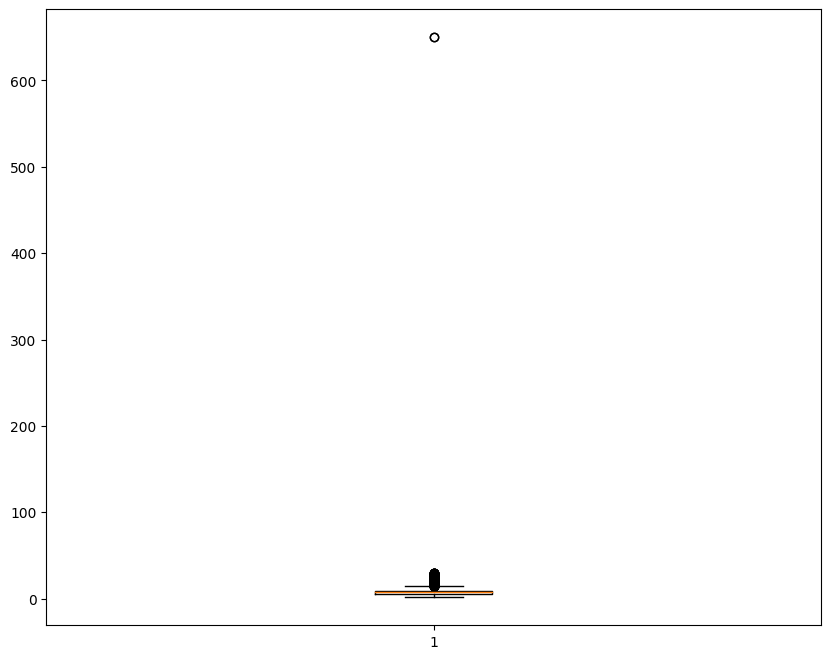

In [11]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(df['TOT_SALES'])
plt.show()

In [12]:
drop_row=df[df['TOT_SALES']>600].index
df.drop(drop_row,inplace=True)

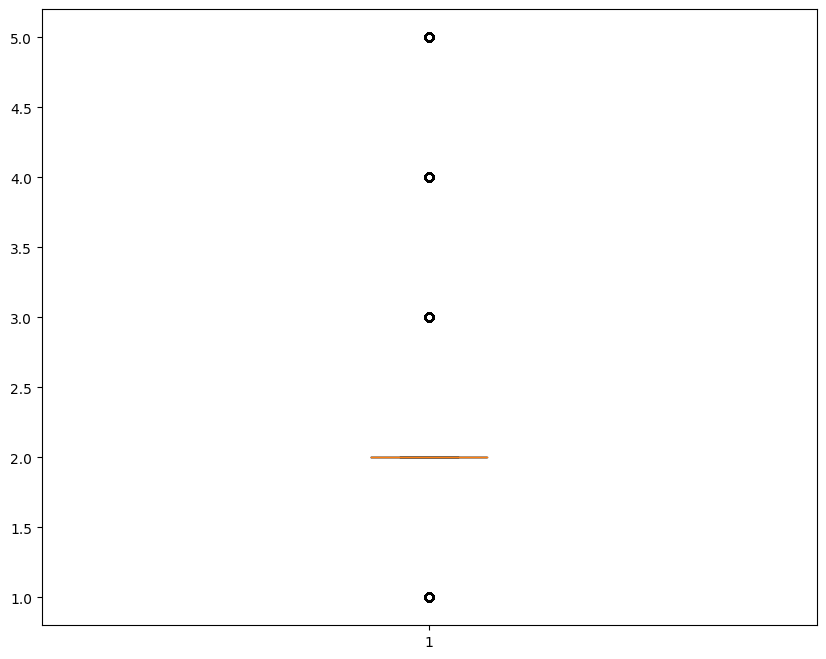

In [13]:
figure = plt.figure(figsize =(10, 8))
plt.boxplot(df['PROD_QTY'])
plt.show()

In [14]:
for col in df.columns:
    print(col, ":", df[col].nunique())
    print('\n')

DATE : 364


STORE_NBR : 272


LYLTY_CARD_NBR : 72636


TXN_ID : 263125


PROD_NBR : 114


PROD_NAME : 114


PROD_QTY : 5


TOT_SALES : 111


LIFESTAGE : 7


PREMIUM_CUSTOMER : 3


product_name : 114


packet_weight : 21




In [15]:
catagorial_col=df.select_dtypes(include=['object']).columns
for i in df[catagorial_col]:
    print( i,100*(list(df[i].value_counts())[0])/(sum(df[i].value_counts())),'%')

PROD_NAME 1.247573951985017 %
LIFESTAGE 20.570999191946655 %
PREMIUM_CUSTOMER 38.5101610820363 %
product_name 1.247573951985017 %
packet_weight 25.091393901920625 %


In [16]:
df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [17]:
lifestyle_sum=df.groupby(['LIFESTAGE'])['TOT_SALES'].sum()

In [18]:
lifestyle_sum

LIFESTAGE
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
OLDER FAMILIES            352467.20
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
Name: TOT_SALES, dtype: float64

In [19]:
print(type(lifestyle_sum))

<class 'pandas.core.series.Series'>


In [20]:
lifestyle_sum = lifestyle_sum.reset_index()

In [21]:
lifestyle_sum.columns = ['LIFESTAGE', 'TOT_SALES']

In [22]:
lifestyle_sum

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,352467.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90
5,YOUNG FAMILIES,316160.10
6,YOUNG SINGLES/COUPLES,260405.30


In [23]:
lifestyle_sum["TOT_SALES"] = pd.to_numeric(lifestyle_sum["TOT_SALES"], downcast="float")
lifestyle_sum.info()
lifestyle_sum.sort_values(by='TOT_SALES',ascending=False,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIFESTAGE  7 non-null      object 
 1   TOT_SALES  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


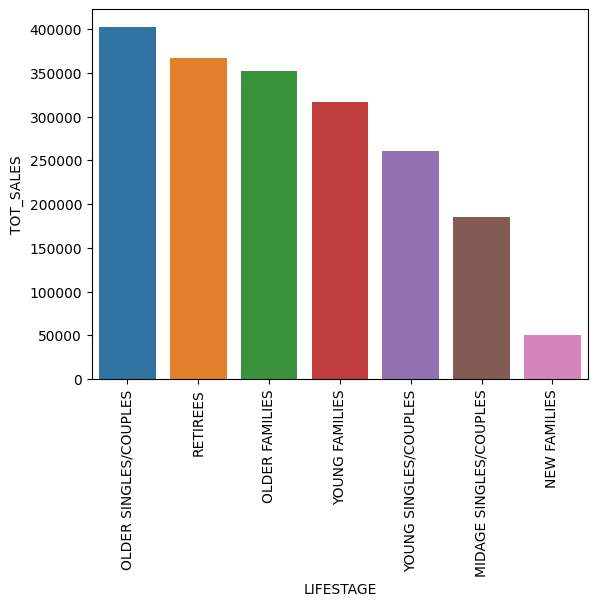

In [24]:
sns.barplot(x='LIFESTAGE',y='TOT_SALES',data=lifestyle_sum)
plt.xticks(rotation=90)
plt.show()

In [25]:
sales_by_weight=df.groupby('packet_weight')['TOT_SALES'].sum().reset_index()
sales_by_weight.index+=1
sales_by_weight.sort_values(by='TOT_SALES', ascending=False,inplace=True)
sales_by_weight

,packet_weight,TOT_SALES
9,175g,477112.4
5,150g,296609.7
3,134g,177655.5
1,110g,162765.4
8,170g,146673.0
18,330g,136794.3
17,300g,113330.6
7,165g,101360.6
19,380g,75419.6
16,270g,55425.4


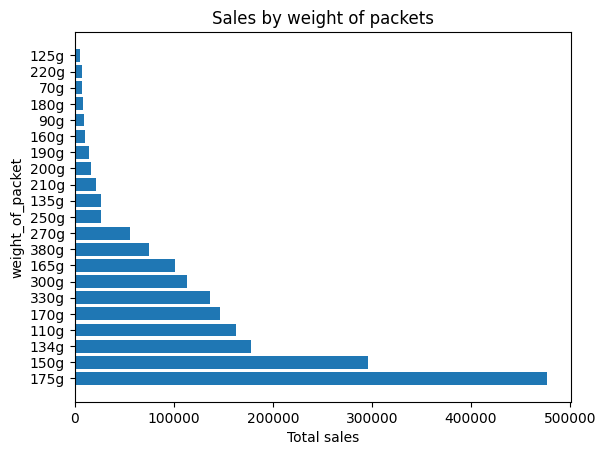

In [26]:
plt.barh(sales_by_weight['packet_weight'],sales_by_weight['TOT_SALES'])
plt.ylabel('weight_of_packet')
plt.xlabel('Total sales')
plt.title("Sales by weight of packets")
plt.show()

In [27]:
most_sold_product=df.groupby('PROD_NBR')['TOT_SALES'].sum().reset_index()
most_sold_product.index+=1
most_sold_product.sort_values(by='TOT_SALES',ascending=False,inplace=True)
most_sold_product['PROD_NBR']=most_sold_product['PROD_NBR'].astype(str)
most_sold_product

,PROD_NBR,TOT_SALES
4,4,39052.0
14,14,36367.6
16,16,34804.2
102,102,34457.4
7,7,34302.6
...,...,...
92,92,4702.2
95,95,4600.2
72,72,4532.2
35,35,4234.5


Text(0.5, 1.0, 'MOST REVENUE BY PRODUCTS')

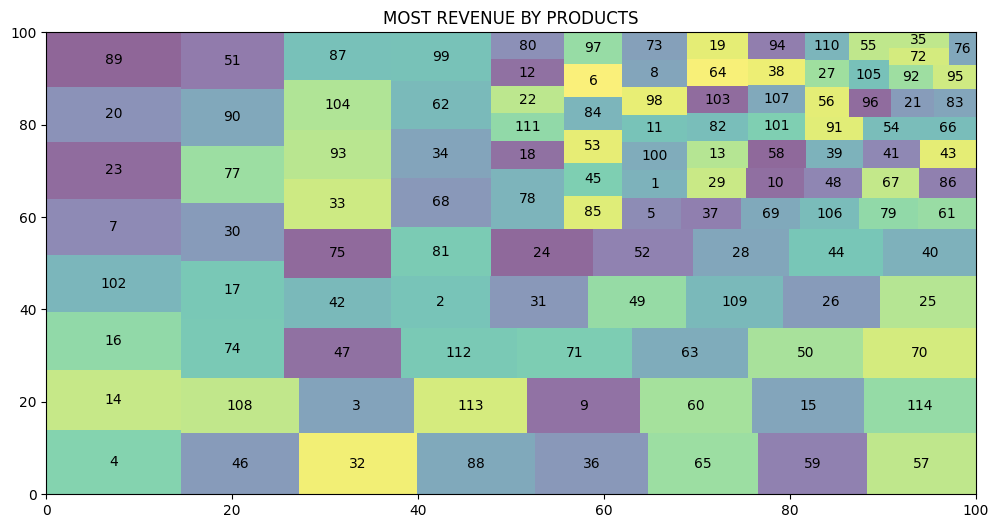

In [28]:
plt.figure(figsize=(12, 6))
# Create the treemap chart
squarify.plot(sizes=most_sold_product['TOT_SALES'], label=most_sold_product['PROD_NBR'], alpha=0.6)
 # Set labels and title
plt.title('MOST REVENUE BY PRODUCTS')


In [29]:
most_sold_product_qty=df.groupby('PROD_NBR')['PROD_QTY'].sum().reset_index()
most_sold_product.index+=1
most_sold_product_qty.sort_values(by='PROD_QTY',ascending=False,inplace=True)
most_sold_product_qty['PROD_NBR']=most_sold_product_qty['PROD_NBR'].astype(str)
most_sold_product_qty.head(5)

,PROD_NBR,PROD_QTY
101,102,6381
107,108,6309
74,75,6277
32,33,6256
73,74,6234


Text(0.5, 1.0, 'Most Sold Products')

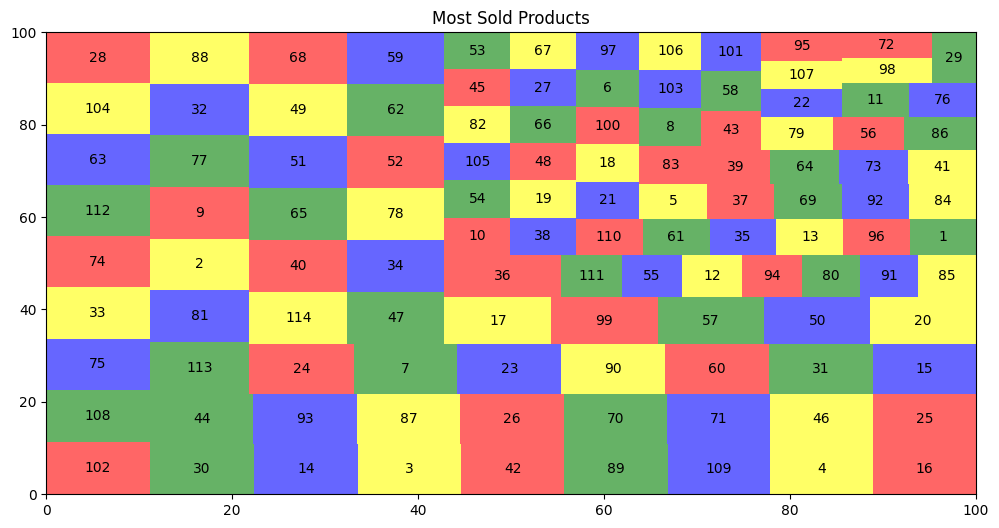

In [30]:
plt.figure(figsize=(12, 6))
# Create the treemap chart
colors = ['red', 'green', 'blue', 'yellow']
squarify.plot(sizes=most_sold_product_qty['PROD_QTY'], label=most_sold_product_qty['PROD_NBR'],color=colors, alpha=0.6)
 # Set labels and title
plt.title('Most Sold Products')

In [31]:
sales_by_cust=df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum().reset_index()
sales_by_cust.index+=1
sales_by_cust.sort_values(by='TOT_SALES',ascending=False,inplace=True)
sales_by_cust

,PREMIUM_CUSTOMER,TOT_SALES
2,Mainstream,750744.50
1,Budget,676211.55
3,Premium,506158.95


([<matplotlib.patches.Wedge at 0x1ebb0ea2590>,
 [Text(0.41229735183482424, 1.126947600232589, 'Mainstream'),
  Text(-1.0142403763709387, -0.42581270406005595, 'Budget'),
  Text(0.7483642797608189, -0.8061953266907909, 'Premium')],
 [Text(0.2405067885703141, 0.6573861001356769, '38.8%'),
  Text(-0.5532220234750574, -0.23226147494184868, '35.0%'),
  Text(0.4081986980513557, -0.43974290546770406, '26.2%')])

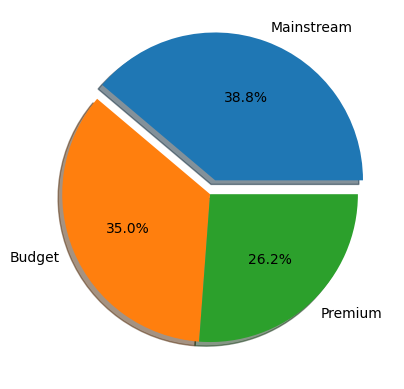

In [32]:
plt.pie(sales_by_cust['TOT_SALES'],labels=sales_by_cust['PREMIUM_CUSTOMER'],autopct='%1.1f%%',explode=(0.1,0,0),shadow=True)

In [33]:
#lifestage_customer=df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
#lifestage_customer
sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum'}).reset_index()
sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,35514.80
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85
2,MIDAGE SINGLES/COUPLES,Premium,58432.65
3,NEW FAMILIES,Budget,21928.45
4,NEW FAMILIES,Mainstream,17013.90
5,NEW FAMILIES,Premium,11491.10
6,OLDER FAMILIES,Budget,168363.25
7,OLDER FAMILIES,Mainstream,103445.55
8,OLDER FAMILIES,Premium,80658.40
9,OLDER SINGLES/COUPLES,Budget,136769.80


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(1, 0, 'NEW FAMILIES'),
  Text(2, 0, 'OLDER FAMILIES'),
  Text(3, 0, 'OLDER SINGLES/COUPLES'),
  Text(4, 0, 'RETIREES'),
  Text(5, 0, 'YOUNG FAMILIES'),
  Text(6, 0, 'YOUNG SINGLES/COUPLES')])

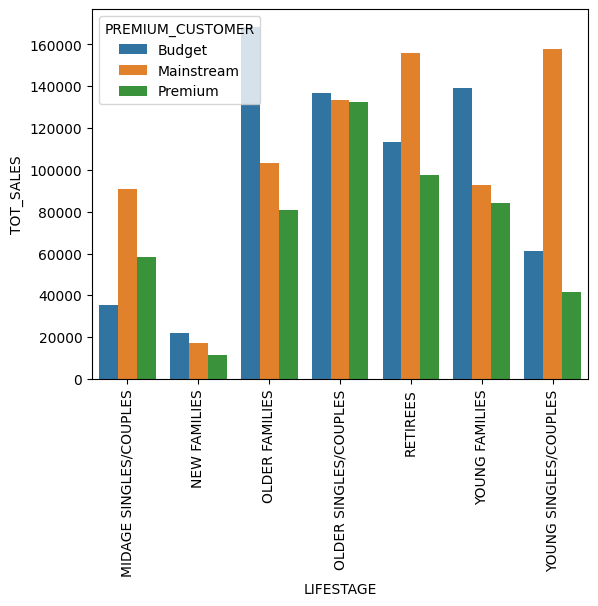

In [34]:
sns.barplot(x='LIFESTAGE',y='TOT_SALES',hue='PREMIUM_CUSTOMER',data=sales)
plt.xticks(rotation=90)

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream retirees

In [35]:
df['STORE_NBR']=df['STORE_NBR'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264834 non-null  datetime64[ns]
 1   STORE_NBR         264834 non-null  object        
 2   LYLTY_CARD_NBR    264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   LIFESTAGE         264834 non-null  object        
 9   PREMIUM_CUSTOMER  264834 non-null  object        
 10  product_name      264834 non-null  object        
 11  packet_weight     258770 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 26.3+ MB


In [36]:
sales_by_store=df.groupby('STORE_NBR')['TOT_SALES'].sum().reset_index()
sales_by_store.sort_values(by='TOT_SALES',ascending=False,inplace=True)
sales_by_store['STORE_NBR'] = sales_by_store['STORE_NBR'].astype(str)
sales_by_store=sales_by_store.head(15)
sales_by_store.reset_index(drop=True,inplace=True)
sales_by_store

,STORE_NBR,TOT_SALES
0,226,17605.45
1,88,16333.25
2,165,15973.75
3,40,15559.50
4,237,15539.50
5,58,15251.45
6,199,14797.00
7,4,14647.65
8,203,14551.60
9,26,14469.30


TypeError: 'bool' object is not callable

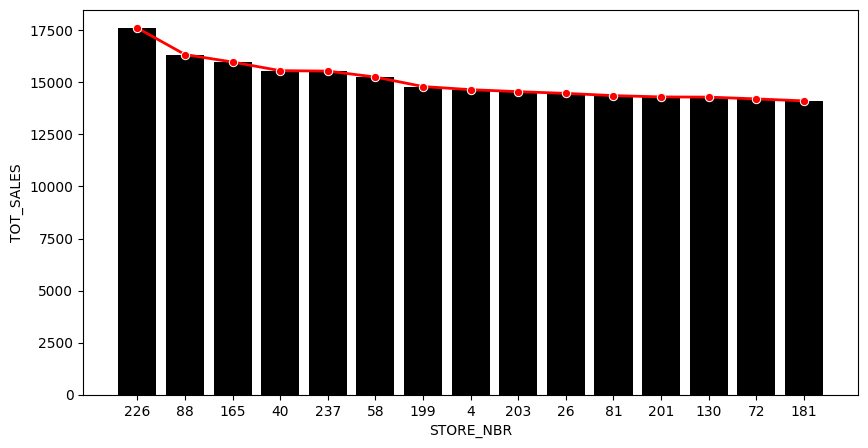

In [48]:

plt.figure(figsize=(10,5))
sns.barplot(x='STORE_NBR', y='TOT_SALES', data=sales_by_store, color='black')
sns.lineplot(x='STORE_NBR', y='TOT_SALES', data=sales_by_store, color='red', linewidth=2, marker='o')
plt.grid(True)
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()

store number 226,88,165,40, 237 are respectively top 5 shopes which are generating more sales

In [38]:
df_after=df[df["DATE"]> '2019-06-30']
df_after['DATE'].nunique()

2

In [39]:
#data of 07-2019 is not for full month it only of two days 
df=df[df["DATE"]< '2019-06-30']

In [40]:
months_total_sales=df[['DATE','TOT_SALES']].resample('M', on='DATE').sum()

months_total_sales

,TOT_SALES
DATE,
2018-07-31,154357.10
2018-08-31,158632.85
2018-09-30,159876.70
2018-10-31,164979.70
2018-11-30,159839.50
2018-12-31,167907.40
2019-01-31,162737.10
2019-02-28,150630.50
2019-03-31,166521.80


TypeError: 'bool' object is not callable

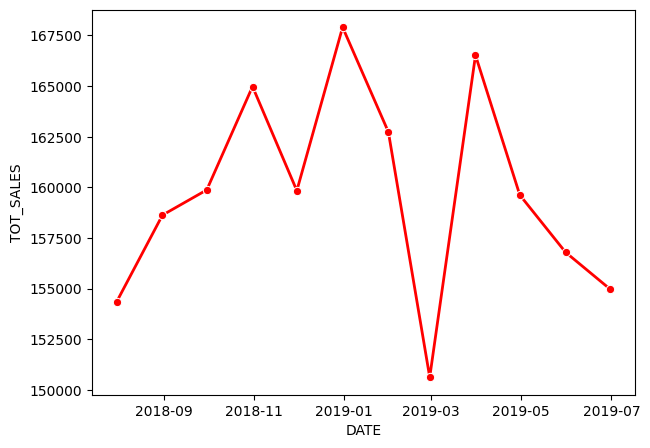

In [41]:
plt.figure(figsize=(7,5))
sns.lineplot(x='DATE',y='TOT_SALES', data=months_total_sales, color='red', linewidth=2, marker='o')
plt.grid(True)
plt.title("Total sales by Months")
plt.xticks(rotation=90)

In [43]:
df['month'] = df['DATE'].dt.strftime('%b%y')
df.month.unique()

C:\Users\Smart pc\AppData\Local\Temp\ipykernel_7108\880327787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['DATE'].dt.strftime('%b%y')


array(['Oct18', 'May19', 'Nov18', 'Mar19', 'Aug18', 'Dec18', 'Jul18',
       'Apr19', 'Jan19', 'Sep18', 'Jun19', 'Feb19'], dtype=object)

In [44]:
product_by_months=df.groupby(['month','PROD_NAME'])['PROD_QTY'].sum().reset_index()
top_product_by_month=product_by_months.groupby('month').head(5)
top_product_by_month.sort_values(by=['month','PROD_QTY'],ascending=[True,False],inplace=True)
top_product_by_month

C:\Users\Smart pc\AppData\Local\Temp\ipykernel_7108\4195468727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_product_by_month.sort_values(by=['month','PROD_QTY'],ascending=[True,False],inplace=True)


,month,PROD_NAME,PROD_QTY
2,Apr19,CCs Original 175g,278
3,Apr19,CCs Tasty Cheese 175g,243
0,Apr19,Burger Rings 220g,237
1,Apr19,CCs Nacho Cheese 175g,229
4,Apr19,Cheetos Chs & Bacon Balls 190g,211
114,Aug18,Burger Rings 220g,258
116,Aug18,CCs Original 175g,253
118,Aug18,Cheetos Chs & Bacon Balls 190g,252
117,Aug18,CCs Tasty Cheese 175g,236
115,Aug18,CCs Nacho Cheese 175g,197


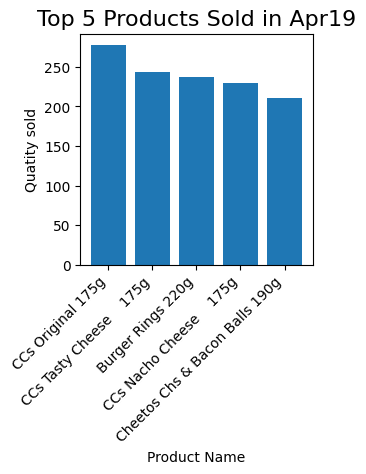

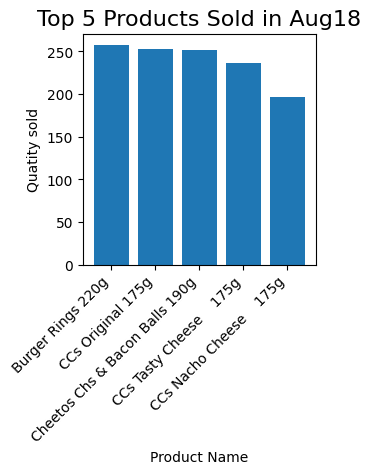

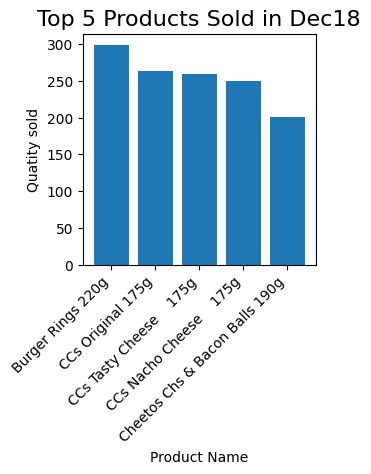

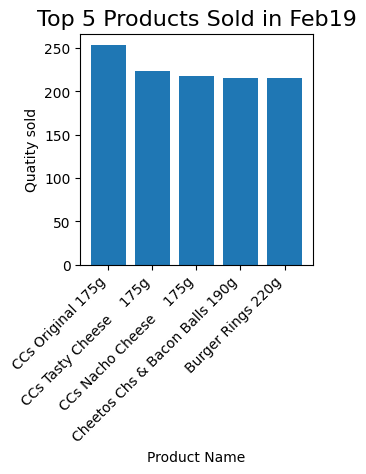

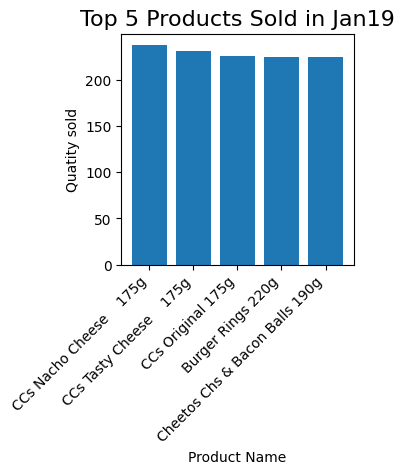

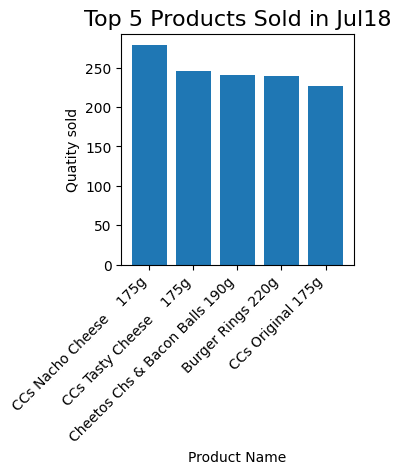

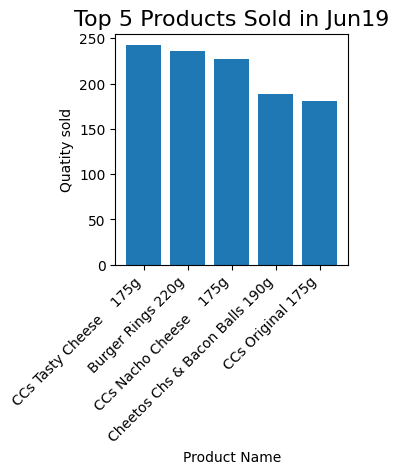

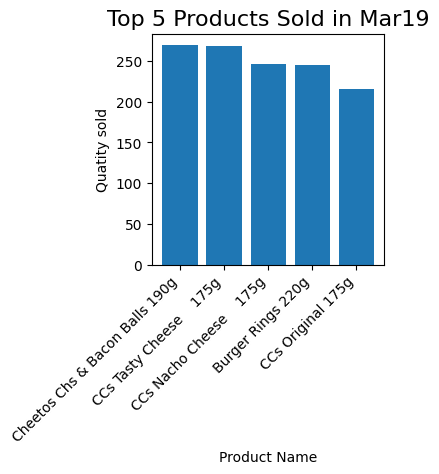

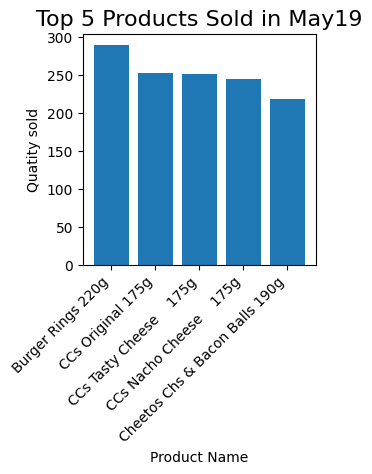

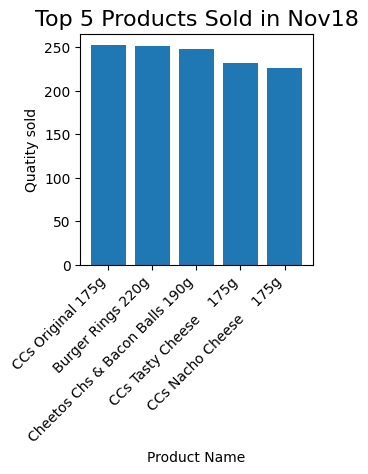

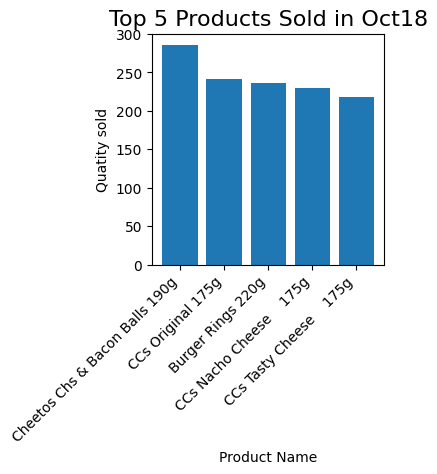

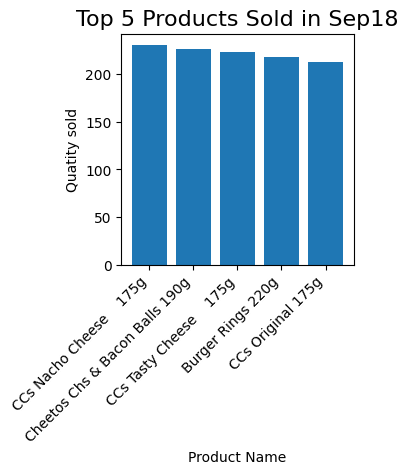

In [45]:
for month, group in top_product_by_month.groupby('month'):
    plt.figure(figsize=(3,3))
    plt.bar(group['PROD_NAME'], group['PROD_QTY'])
    plt.title(f'Top 5 Products Sold in {month}', fontsize=16)
    plt.xlabel('Product Name', fontsize=10)
    plt.ylabel('Quatity sold', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [46]:
most_sales_by_lifestage=df.groupby(['LIFESTAGE','PROD_NAME'])['PROD_QTY'].count().reset_index()
most_sales_by_lifestage=most_sales_by_lifestage.groupby('LIFESTAGE').head(5)
most_sales_by_lifestage.sort_values(by=['LIFESTAGE','PROD_QTY'],ascending=False)

,LIFESTAGE,PROD_NAME,PROD_QTY
685,YOUNG SINGLES/COUPLES,CCs Nacho Cheese 175g,217
687,YOUNG SINGLES/COUPLES,CCs Tasty Cheese 175g,202
684,YOUNG SINGLES/COUPLES,Burger Rings 220g,176
688,YOUNG SINGLES/COUPLES,Cheetos Chs & Bacon Balls 190g,174
686,YOUNG SINGLES/COUPLES,CCs Original 175g,171
571,YOUNG FAMILIES,CCs Nacho Cheese 175g,310
570,YOUNG FAMILIES,Burger Rings 220g,293
573,YOUNG FAMILIES,CCs Tasty Cheese 175g,292
572,YOUNG FAMILIES,CCs Original 175g,288
574,YOUNG FAMILIES,Cheetos Chs & Bacon Balls 190g,276


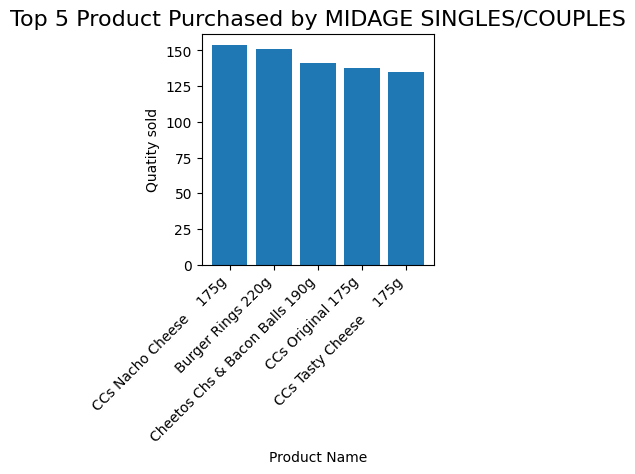

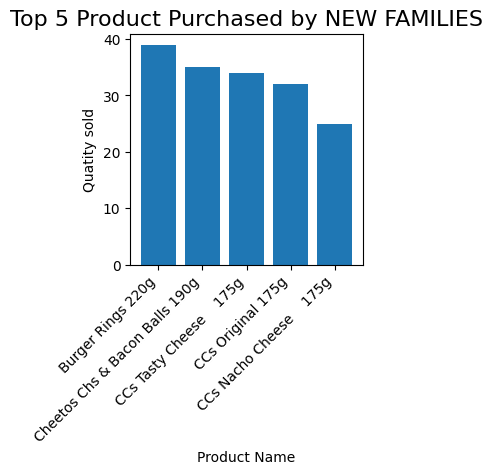

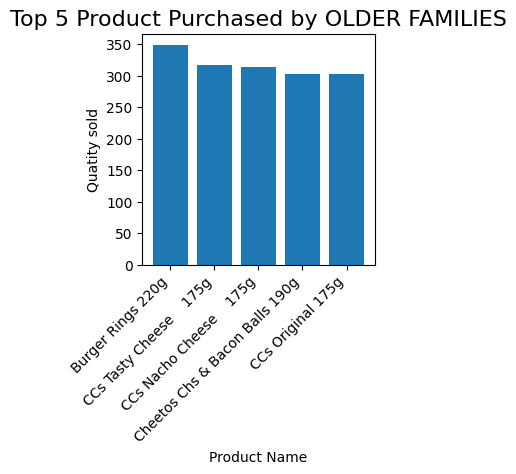

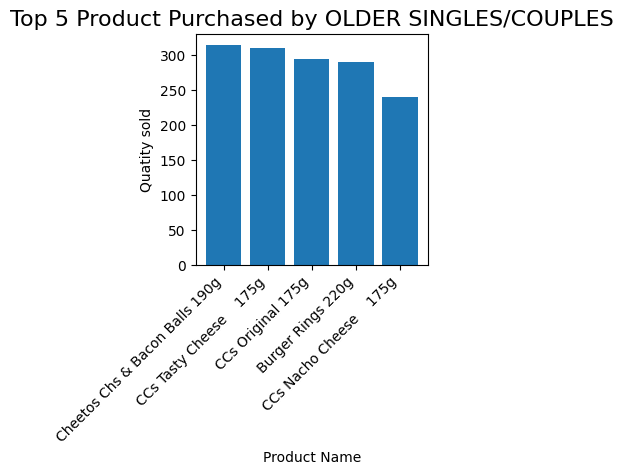

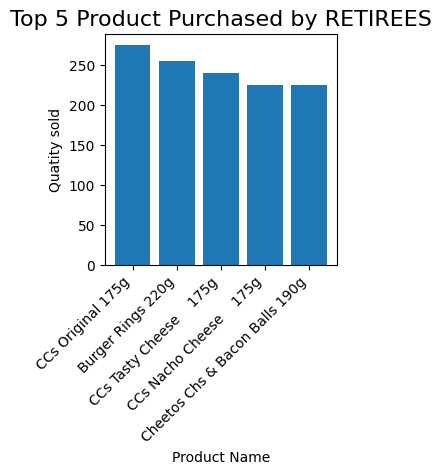

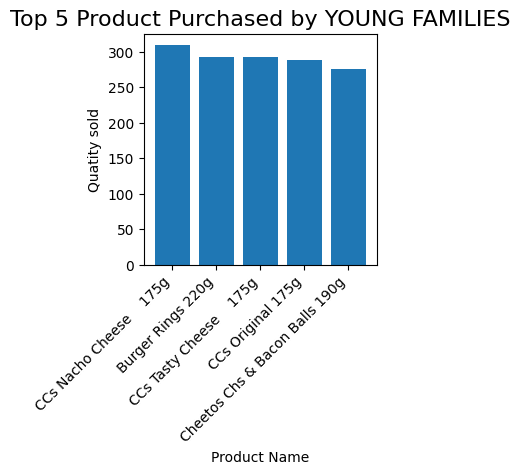

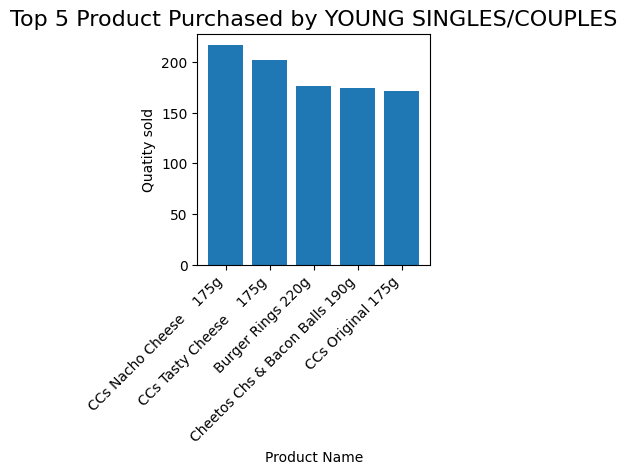

In [47]:
for lifestage,group in most_sales_by_lifestage.groupby('LIFESTAGE'):
    plt.figure(figsize=(3,3))
    sorted_group=group.sort_values(by='PROD_QTY',ascending=False)
    plt.bar(sorted_group['PROD_NAME'], sorted_group['PROD_QTY'])
    plt.title(f'Top 5 Product Purchased by {lifestage}', fontsize=16)
    plt.xlabel('Product Name', fontsize=10)
    plt.ylabel('Quatity sold', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.show()

CONCLUSION : 
Based on the data analysis, it appears that older families, older singles/couples, and retirees are the main customers who are spending more on chips. The products with weights of 175 and 150 seem to be particularly attractive to these customer segments. The products with the most quantity sold are numbers 102, 108, 75, 33, and 74. Additionally, the majority of sales are coming from products numbered 4, 14, 16, and 102.

Furthermore, it seems that sales are primarily generated from the Budget segment, which includes older families, and the Mainstream segment, which includes young singles/couples and retirees. Among the stores, numbers 226, 88, 165, 40, and 237 are the top 5 shops that generate the most sales.
CC's products are in high demand, with all types of families showing a strong liking for them.

In terms of time period, the month of December 2018 and March 2019 saw the highest sales compared to other months of the year. However, sales in February 2019 experienced a decline